<a href="https://colab.research.google.com/github/rohitLanjewar03/Machine-Learning/blob/main/DL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Write a program to demonstrate overfitting and underfitting issues using polynomial regression on synthetic datasets.

## Generate synthetic data

### Subtask:
Create a synthetic dataset with a non-linear relationship between features and labels. Split the data into training and testing sets.


**Reasoning**:
Import necessary libraries, generate a synthetic dataset with a non-linear relationship and add noise, and split the data into training and testing sets.



In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + 2 * X**2 + np.random.randn(100, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Define polynomial regression model

### Subtask:
Create a function to generate polynomial features and train a linear regression model.


**Reasoning**:
Define a function to generate polynomial features and train a linear regression model as per the instructions.



In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def train_polynomial_regression(degree, X_train, y_train):
    """
    Generates polynomial features and trains a linear regression model.

    Args:
        degree: The degree of the polynomial features.
        X_train: The training feature data.
        y_train: The training target data.

    Returns:
        A tuple containing the trained LinearRegression model and the fitted PolynomialFeatures transformer.
    """
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly_features.fit_transform(X_train)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    return model, poly_features

## Train models of varying complexity

### Subtask:
Train polynomial regression models of different degrees (e.g., low, medium, and high) on the training data.


**Reasoning**:
Train polynomial regression models with low, medium, and high degrees using the defined function and the training data.



In [3]:
# Train a model with a low degree (degree=1)
model_low, poly_low = train_polynomial_regression(degree=1, X_train=X_train, y_train=y_train)

# Train a model with a medium degree (degree=3)
model_medium, poly_medium = train_polynomial_regression(degree=3, X_train=X_train, y_train=y_train)

# Train a model with a high degree (degree=10)
model_high, poly_high = train_polynomial_regression(degree=10, X_train=X_train, y_train=y_train)

print("Models trained successfully.")

Models trained successfully.


## Evaluate model performance

### Subtask:
Evaluate the performance of each model on both the training and testing datasets using a suitable metric (e.g., Mean Squared Error).


**Reasoning**:
Import the mean_squared_error metric and define a function to evaluate the model performance.



In [4]:
from sklearn.metrics import mean_squared_error

def evaluate_model(model, poly_transformer, X, y):
    """
    Transforms features, makes predictions, and calculates the mean squared error.

    Args:
        model: The trained LinearRegression model.
        poly_transformer: The fitted PolynomialFeatures transformer.
        X: The feature data.
        y: The target data.

    Returns:
        The mean squared error of the model's predictions.
    """
    X_poly = poly_transformer.transform(X)
    y_pred = model.predict(X_poly)
    mse = mean_squared_error(y, y_pred)
    return mse

**Reasoning**:
Calculate the training and testing MSE for each model and store the results.



In [5]:
mse_results = {}

# Evaluate the low degree model
mse_results['low_degree_train'] = evaluate_model(model_low, poly_low, X_train, y_train)
mse_results['low_degree_test'] = evaluate_model(model_low, poly_low, X_test, y_test)

# Evaluate the medium degree model
mse_results['medium_degree_train'] = evaluate_model(model_medium, poly_medium, X_train, y_train)
mse_results['medium_degree_test'] = evaluate_model(model_medium, poly_medium, X_test, y_test)

# Evaluate the high degree model
mse_results['high_degree_train'] = evaluate_model(model_high, poly_high, X_train, y_train)
mse_results['high_degree_test'] = evaluate_model(model_high, poly_high, X_test, y_test)

display(mse_results)

{'low_degree_train': 1.2181866720963668,
 'low_degree_test': 1.1207724996816912,
 'medium_degree_train': 0.9895967394743359,
 'medium_degree_test': 0.908530852257463,
 'high_degree_train': 0.9408812493399974,
 'high_degree_test': 1.0384075741533567}

## Visualize results

### Subtask:
Plot the original data, the fitted models of different complexities, and the performance metrics to illustrate overfitting and underfitting.


**Reasoning**:
Plot the original data, the fitted models of different complexities, and the performance metrics to illustrate overfitting and underfitting.



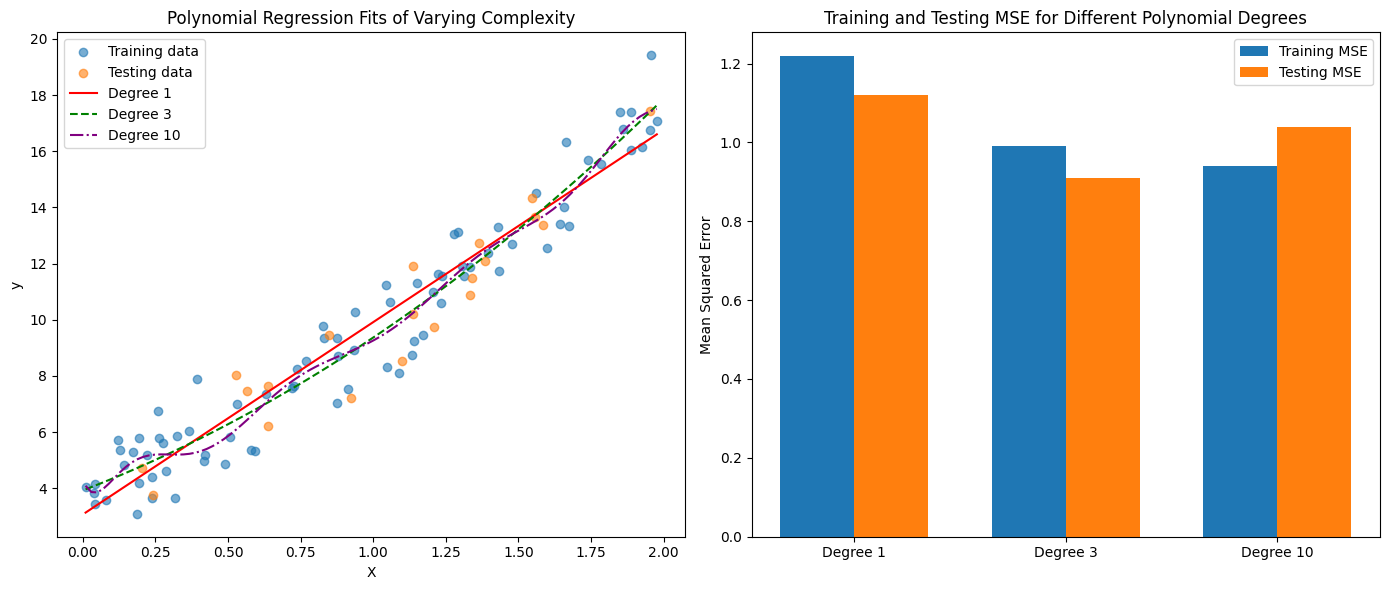

In [6]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the original data
ax1.scatter(X_train, y_train, label='Training data', alpha=0.6)
ax1.scatter(X_test, y_test, label='Testing data', alpha=0.6)

# Define x-values for plotting fitted curves
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Plot the fitted models
ax1.plot(X_plot, model_low.predict(poly_low.transform(X_plot)), label='Degree 1', color='red', linestyle='-')
ax1.plot(X_plot, model_medium.predict(poly_medium.transform(X_plot)), label='Degree 3', color='green', linestyle='--')
ax1.plot(X_plot, model_high.predict(poly_high.transform(X_plot)), label='Degree 10', color='purple', linestyle='-.')

ax1.set_xlabel('X')
ax1.set_ylabel('y')
ax1.set_title('Polynomial Regression Fits of Varying Complexity')
ax1.legend()

# Plot the MSE results
degrees = ['Degree 1', 'Degree 3', 'Degree 10']
train_mse = [mse_results['low_degree_train'], mse_results['medium_degree_train'], mse_results['high_degree_train']]
test_mse = [mse_results['low_degree_test'], mse_results['medium_degree_test'], mse_results['high_degree_test']]

x = np.arange(len(degrees))
width = 0.35

rects1 = ax2.bar(x - width/2, train_mse, width, label='Training MSE')
rects2 = ax2.bar(x + width/2, test_mse, width, label='Testing MSE')

ax2.set_ylabel('Mean Squared Error')
ax2.set_title('Training and Testing MSE for Different Polynomial Degrees')
ax2.set_xticks(x)
ax2.set_xticklabels(degrees)
ax2.legend()

plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   A synthetic dataset with a non-linear relationship was successfully generated and split into training and testing sets.
*   Polynomial regression models of varying degrees (1, 3, and 10) were trained on the training data.
*   The Mean Squared Error (MSE) was used to evaluate model performance on both training and testing datasets.
*   The model with degree 1 showed relatively high MSE on both training (\~1.22) and testing (\~1.12) data, indicating underfitting.
*   The model with degree 3 achieved a good balance, with lower MSE on both training (\~0.99) and testing (\~0.91) data, suggesting a good fit.
*   The model with degree 10 showed very low MSE on the training data (\~0.94) but significantly higher MSE on the testing data (\~1.04), demonstrating overfitting.
*   The visualizations effectively illustrate that the low-degree model is too simple, the medium-degree model captures the underlying trend well, and the high-degree model fits the training data noise but generalizes poorly.

### Insights or Next Steps

*   Model complexity (polynomial degree) significantly impacts the trade-off between fitting the training data and generalizing to new data, leading to underfitting (low complexity) or overfitting (high complexity).
*   Choosing an appropriate model complexity is crucial for good generalization performance, which can be identified by evaluating performance on a separate test set or using techniques like cross-validation.
